## Model to predict the app rating, with other information about the app provided.

## 1. Load the data file using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import numpy as nu

In [2]:
data=pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Checking for  the null values in the data.

In [4]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###  Droping records with null in any colmns

In [5]:
print("Frame Size before : " ,data.shape)
data.dropna(subset=['Rating','Type','Content Rating','Current Ver','Android Ver'],axis=0, inplace=True)
print("Frame Size After : " ,data.shape)

Frame Size before :  (10841, 13)
Frame Size After :  (9360, 13)


In [6]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Checking and Fixing the incorrect type and inconsistent formatting.


###  Size column have both kb and mb format so changing into kb and multiplying by 1000 and making into numeric format

In [7]:
j=data.columns.get_loc('Size')
for i in range(0,len(data)):
    if data.iloc[i,j].lower().endswith('k'):
        data.iloc[i,j]=float(data.iloc[i,j][0:-1])
    elif data.iloc[i,j].lower().endswith('m'):
        data.iloc[i,j]=float(data.iloc[i,j][0:-1])*1000


In [8]:
data.Size=pd.to_numeric(data.Size,errors='coerce')
data.dropna(subset=['Size'],inplace=True)
data.shape

(7723, 13)

In [9]:
data.Size.dtype

dtype('float64')

### Changing data type of Reviews column from string to numeric as it is a numeric qty


In [10]:
data.Reviews=data.Reviews.astype('float64')
data.Reviews.dtypes

dtype('float64')

### Correcting the Installs column format and data type

In [11]:
data.Installs=data.Installs.str.replace(',','')
data.Installs=data.Installs.str.replace('+','').astype('int64')

In [12]:
data.Installs.dtype

dtype('int64')

### Correcting Price column format and data type

In [13]:
data.Price=data.Price.str.replace('$','').astype('float64')

In [14]:
data.Price.dtype

dtype('float64')

## Sanity checks

In [15]:
filter=(data.Rating < 1) | (data.Rating > 5)
print("Data Frame size : ", data.shape, " count of rows containing WRONG Rating : ",filter.value_counts())

Data Frame size :  (7723, 13)  count of rows containing WRONG Rating :  False    7723
Name: Rating, dtype: int64


In [ ]:
#All Ratings are fine so no need to drop any.

In [ ]:
#  Reviews should not be more than installs as only those who installed can review the app. 

In [16]:
rows=data[data.Installs < data.Reviews].index
data.drop(rows,axis=0,inplace=True)
data.shape

(7717, 13)

In [17]:
rows=data[(data.Type.str.lower()=='free' )& (data.Price > 0)].index
rows

Int64Index([], dtype='int64')

In [ ]:
# So there is no such instance of free app having price >0 .

## Univariate Analysis

#### BOXPLOT FOR PRICE

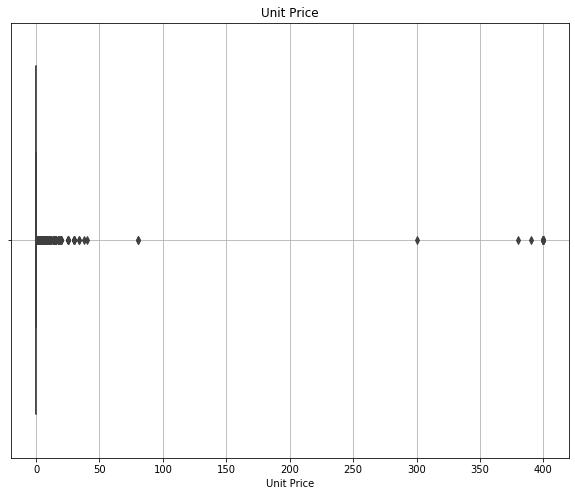

In [18]:
py.subplots(figsize=(10,8))
sns.boxplot(data["Price"])
py.xlabel('Unit Price')
py.grid(linestyle="-")
py.title('Unit Price')
py.show()

In [ ]:
# Yes there are outliers above price > $250.

#### BOXPLOT FOR REVIEWS

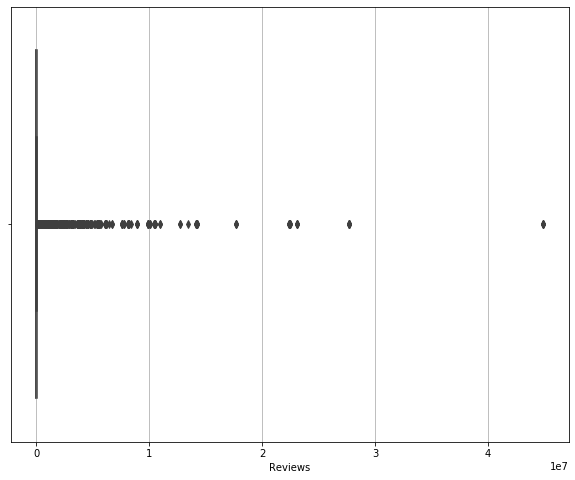

In [19]:
py.subplots(figsize=(10,8))
py.grid(linestyle="-")
sns.boxplot(data['Reviews'])
py.show()

In [ ]:
# Yes there are few apps with higher no of reviews.

#### HISTOGRAM FOR RATING

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

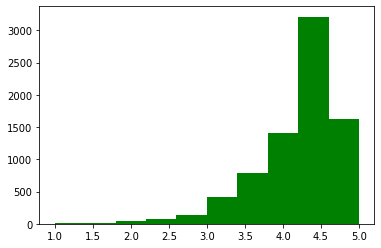

In [20]:
py.hist(data['Rating'],color='g')

In [ ]:
# from Histogram it is really clear that Rating distribution is left skewed and more towards higher rating.

#### HISTOGRAM FOR SIZE

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <a list of 10 Patch objects>)

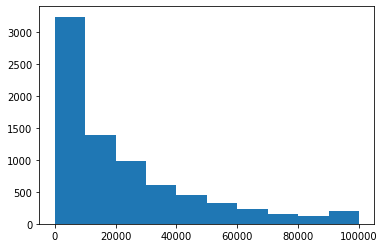

In [21]:
py.hist(data['Size'])

In [ ]:
# from Histogram it is really clear that Size distribution is bit  right skewed.

### Outlier treatment:

####  From the box plot, it seems like there are some apps with very high price. A price of 200 for an application on the Play Store is very high and rare

In [22]:
data.drop(data[data.Price>250].index,axis=0,inplace=True)
data.shape

(7702, 13)

#### From the box plot it seems that there are few apps having very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it so dropping them.

In [23]:
data.drop(data[data.Reviews>2000000].index,axis=0,inplace=True)
data.shape

(7483, 13)

####  There seems to be some outliers in INSTALLS column too. These apps can be dropped by selecting a cutoff threshold so that it don't affect the analysis.

In [24]:
data.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [ ]:
# Taking 10000000 as the cutoff as only 5% records have values more than this

In [25]:
data=data[data.Installs<10000000]
data.shape

(6489, 13)

### BiVariate Analysis

 ####  Scatter plot/joinplot for Rating vs. Price

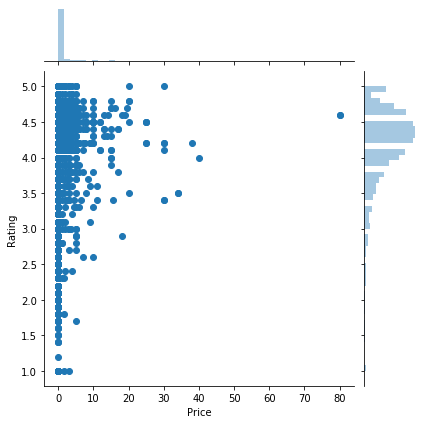

In [26]:
sns.jointplot(data["Price"],data["Rating"],data=data)

In [ ]:
# So we can analyze from the scatter plot that rating doesn't increase with price.

#### Scatter plot/joinplot for Rating vs. Size

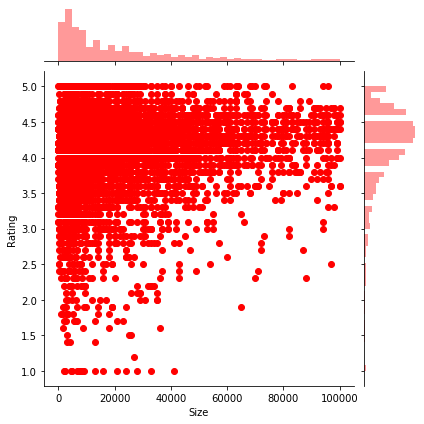

In [27]:
sns.jointplot(data["Size"],data["Rating"],data=data,color='r')

In [ ]:
# So we can observe from the scatter plot that heavier apps tends to have higher rating.

#### Scatter plot/joinplot for Rating vs. Reviews

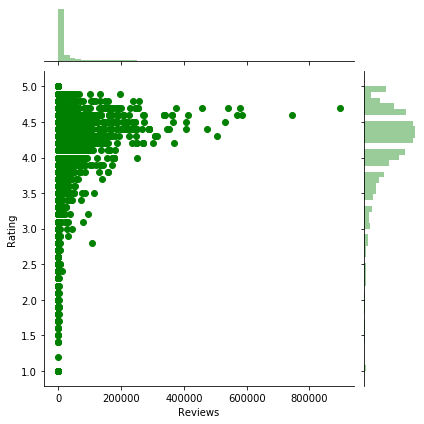

In [28]:
sns.jointplot(data["Reviews"],data["Rating"],data=data,color='g')

In [ ]:
#  So we can observe from the Scatter plot that higher rating for apps are having Max reviews. 
# But this cannot be always as it could be an outlier.

#### Box Plot Rating vs Content Rating

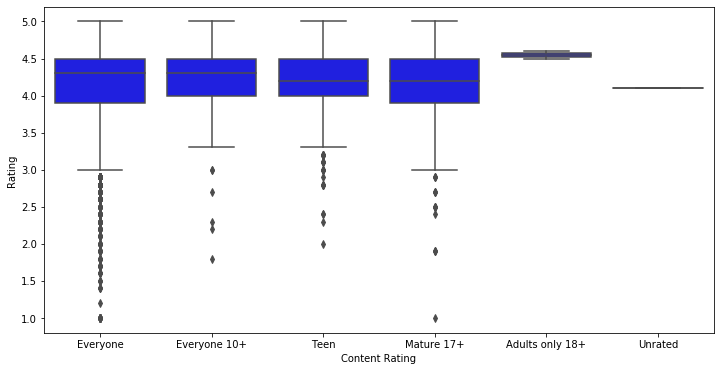

In [29]:
py.figure(figsize=(12,6))
sns.boxplot(data["Content Rating"],data["Rating"],data=data,color='b')

In [ ]:
# Not much conclusion could be drawn as the plot is almost same for Content Ratings, except Adults only 18+ & Unrated

#### Box Plot Rating vs Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

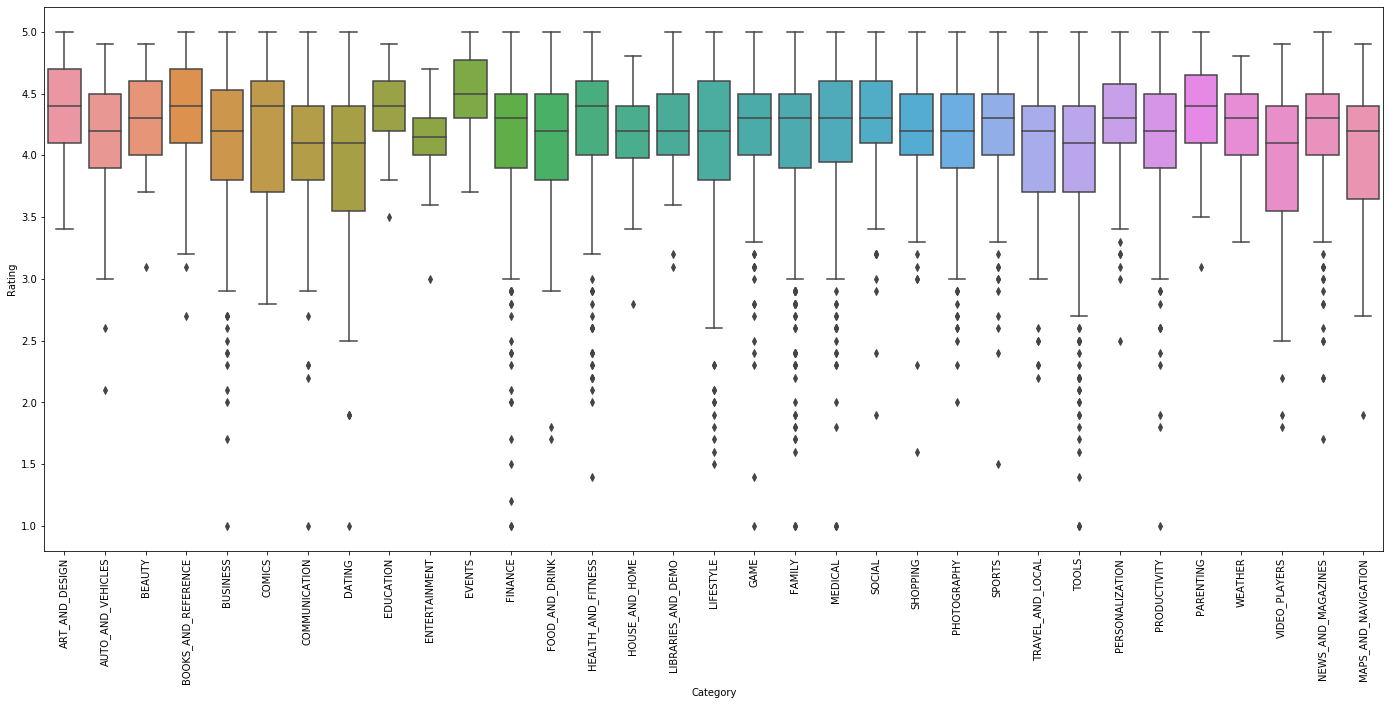

In [30]:
py.figure(figsize=(24,10))
sns.boxplot(data["Category"],data["Rating"],data=data)
py.xticks(rotation=90)

In [ ]:
# So ART_AND_DESIGN category has best ratings

### Data Preprocessing for model creation

In [31]:
inp1=data
inp1.reset_index(drop=True,inplace=True)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


####  Applying log transformation (np.log1p) to Reviews and Installs in order to reduce the skewness.

In [32]:
inp1.Reviews=nu.log1p(inp1.Reviews)
inp1.Installs=nu.log1p(inp1.Installs)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


####  Droping columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [33]:
inp1.drop(['App', 'Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [34]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


####  Dummy columns for Category, Genres, and Content Rating as these are string type.

In [35]:
inp1=pd.get_dummies(inp1,columns=['Category', 'Genres', 'Content Rating','Type'],drop_first=True)
inp2=inp1.copy()
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Paid'],
      dtype='object', length=150)

### Model Creation by using Linear Regression as we are predicting app rating.

#### Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

In [36]:
from sklearn.model_selection import train_test_split 
df_train, df_test=train_test_split(inp2,test_size=0.3,random_state=100)

In [37]:
y_train=df_train.pop('Rating')
X_train=df_train
y_test=df_test.pop('Rating')
X_test=df_test

#### Model Making

In [38]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Performance Metrics for model

In [39]:
from sklearn.metrics import r2_score
y_train_predict=lm.predict(X_train)
r2_score(y_train,y_train_predict)

0.14998979685933733

In [ ]:
# So R2 Score for our model is 0.1499897

#### Making prediction on test data

In [40]:
y_pred=lm.predict(X_test)
r2_score(y_test,y_pred)

0.114305998578201